# Comparison between theoretical and subcircuit solution for different Trotter-steps

In [4]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from src.subcircuit import *

## Theoretical solution

In [5]:
q0 = np.array([1, 0])
q1 = np.array([1, 0]) 
q2 = np.array([0, 1])
q3 = np.array([0, 1])

y0 = np.kron(np.kron(np.kron(q0, q1), q2), q3)

t = 1.086 

sign = 1

c = 1

H = np.kron(np.kron(np.kron(Z, Z), Z), Z)

theoretical_result = np.abs(np.dot(expm(1j * t * H), y0))**2

## Subcircuit solutions

In [6]:
delta_t = np.linspace(0.00001, 0.1, 100)

errors = []

for ti in delta_t:
    practical_result = depth_5_decomposition(ti, sign, c, y0)
    real = np.abs(practical_result)**2
    errors.append(theoretical_result - real) 

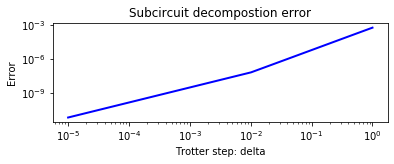

In [7]:
delta_t = np.linspace(0.00001, 1, 100)
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
plt.plot(delta_t, errors, color='blue', lw=2)
plt.yscale('log')
plt.xscale('log')
ax.set_title("Subcircuit decompostion error");
ax.set_xlabel("Trotter step: delta")
ax.set_ylabel("Error");
#plt.savefig('error',  dpi=200)
plt.show()